In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [180]:
# Libraries to visualize inline jupyter map
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

In [301]:
# Libraries for data processing
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.impute import KNNImputer

In [275]:
# Libraries for building model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for getting the performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Data Collection and Analysis 

In [182]:
air_bnb_df = pd.read_csv("Airbnb_NewYork.csv")

In [183]:
air_bnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [184]:
# CHeck for number of rows and columns
air_bnb_df.shape

(48895, 16)

In [185]:
air_bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [186]:
# Check for missing value
air_bnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [187]:
air_bnb_df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [188]:
# Statistical Measure
air_bnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [189]:
categorical_data = []
numerical_data = []
for col in air_bnb_df.columns:
    if air_bnb_df[col].dtype == "object":
        categorical_data.append(col)
    else:
        numerical_data.append(col)
        
print(categorical_data)
print(numerical_data)

['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']
['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [190]:
# details of categorical columns
for i in categorical_data:
    print(f"{i}: \n")
    print("values: " , air_bnb_df[i].unique())
    print("Length: ", len(air_bnb_df[i].unique()))
    print("Total null values: ", air_bnb_df[i].isnull().sum())
    print("******************************************")

name: 

values:  ['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' ...
 'Sunny Studio at Historical Neighborhood'
 '43rd St. Time Square-cozy single bed'
 "Trendy duplex in the very heart of Hell's Kitchen"]
Length:  47906
Total null values:  16
******************************************
host_name: 

values:  ['John' 'Jennifer' 'Elisabeth' ... 'Abayomi' 'Alberth' 'Ilgar & Aysel']
Length:  11453
Total null values:  21
******************************************
neighbourhood_group: 

values:  ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Length:  5
Total null values:  0
******************************************
neighbourhood: 

values:  ['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Green

In [191]:
# details of numerical columns
for i in numerical_data:
    print(f"{i}: \n")
    print("values: " , air_bnb_df[i].unique())
    print("Length: ", len(air_bnb_df[i].unique()))
    print("Total null values: ", air_bnb_df[i].isnull().sum())
    print("******************************************")

id: 

values:  [    2539     2595     3647 ... 36485431 36485609 36487245]
Length:  48895
Total null values:  0
******************************************
host_id: 

values:  [     2787      2845      4632 ... 274321313  23492952  68119814]
Length:  37457
Total null values:  0
******************************************
latitude: 

values:  [40.64749 40.75362 40.80902 ... 40.80953 40.70184 40.81475]
Length:  19048
Total null values:  0
******************************************
longitude: 

values:  [-73.97237 -73.98377 -73.9419  ... -73.87727 -73.93614 -73.80844]
Length:  14718
Total null values:  0
******************************************
price: 

values:  [  149   225   150    89    80   200    60    79   135    85   120   140
   215    99   190   299   130   110    44   180    50    52    55    70
    35    40    68   115   151   228   144    69    49   375   250   275
   230    51    65   105    95   145   285    94   800   131    98   100
   125   175   500   101   220    59   3

### Handling the missing value

In [192]:
# Processing the data in "review_per_month" column
reviews_df = air_bnb_df[["reviews_per_month"]]
reviews_df.head()

,reviews_per_month
0,0.21
1,0.38
2,NaN
3,4.64
4,0.10


Robust Scaler: RobustScaler is a class in sklearn.preprocessing module that scales features using statistics that are robust to outliers. It removes the median and scales the data according to the quantile range between the first and third quartile. It has arguments to control whether the value is centered to zero, scaled to the interquartile range, or copied.

In [193]:
# handling the outliers
review_rs = RobustScaler()

In [194]:
reviews_df = pd.DataFrame(review_rs.fit_transform(reviews_df), 
                          columns=reviews_df.columns)
reviews_df.head()

,reviews_per_month
0,-0.278689
1,-0.185792
2,NaN
3,2.142077
4,-0.338798


KNN Imputer: KNNimputer is a scikit-learn class used to fill out or predict the missing values in a dataset. It is a more useful method which works on the basic approach of the KNN algorithm rather than the naive approach of filling all the values with mean or the median. In this approach, we specify a distance from the missing values which is also known as the K parameter. The missing value will be predicted in reference to the mean of the neighbours. It is implemented by the KNNimputer().

In [195]:
# handling the missing value
reviews_df = pd.DataFrame(KNNImputer(n_neighbors=5).fit_transform(reviews_df), 
                          columns = reviews_df.columns)
reviews_df.head()

,reviews_per_month
0,-0.278689
1,-0.185792
2,0.356952
3,2.142077
4,-0.338798


In [196]:
# Now inverse scale the effect of robust scaler
# ( Scaling done only to perform KNN Immpute)

reviews_df = pd.DataFrame(review_rs.inverse_transform(reviews_df), 
                          columns = reviews_df.columns)
reviews_df.head()


,reviews_per_month
0,0.210000
1,0.380000
2,1.373221
3,4.640000
4,0.100000


In [197]:
# update the main dataframe

air_bnb_df[["reviews_per_month"]] = reviews_df

In [198]:
air_bnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


## Data Visualization

In [199]:
longitude = -73.95  # mean latitude and longitude values
latitude = 40.72

locations = list(zip(air_bnb_df.latitude, air_bnb_df.longitude))
loc_map = folium.Map(location = [latitude, longitude], zoom_start=10)
FastMarkerCluster(data=locations).add_to(loc_map)

loc_map

In [200]:
# Heat map for geographical distribution
map_heat = folium.Map([40.728949, -73.952170], zoom_start=10)

HeatMap(air_bnb_df[['latitude', 'longitude']], radius = 10, 
        gradient = {0.2: 'black', 0.4: 'green', 
                    0.6: 'yellow', 1.0: 'red'}).add_to(map_heat)

map_heat

### Analysis of categorical Variables

In [201]:
print(categorical_data)

['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


<Axes: xlabel='neighbourhood_group', ylabel='count'>

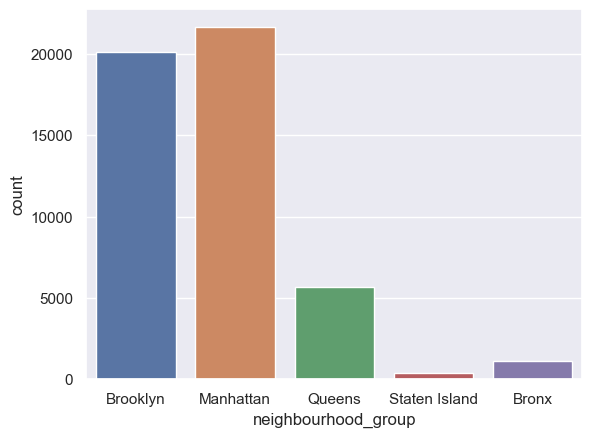

In [202]:
# plot for 'neighbourhood_group'
print(air_bnb_df['neighbourhood_group'].value_counts())
sns.countplot(x = 'neighbourhood_group', data = air_bnb_df)

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


<Axes: xlabel='room_type', ylabel='count'>

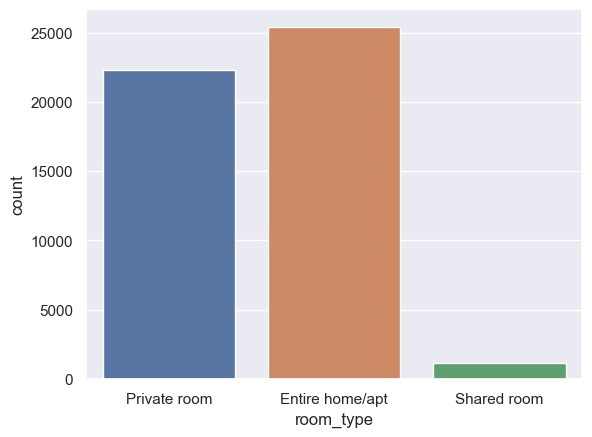

In [203]:
# plot for 'room_type'
print(air_bnb_df['room_type'].value_counts())
sns.countplot(x = 'room_type', data = air_bnb_df)

### Numerical column analysis

In [204]:
numerical_data

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

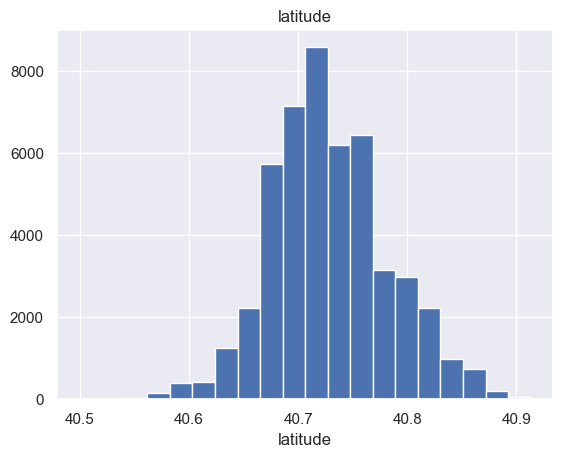

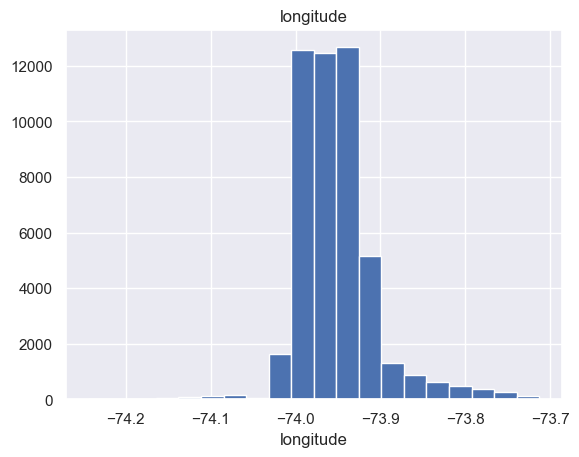

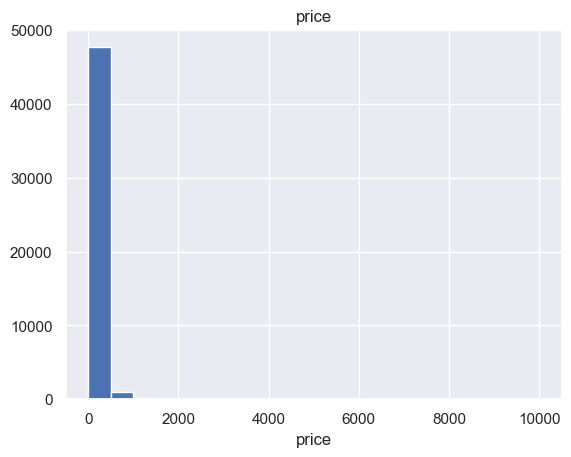

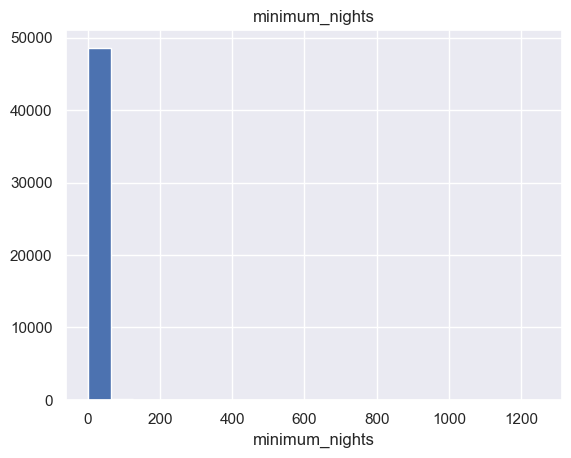

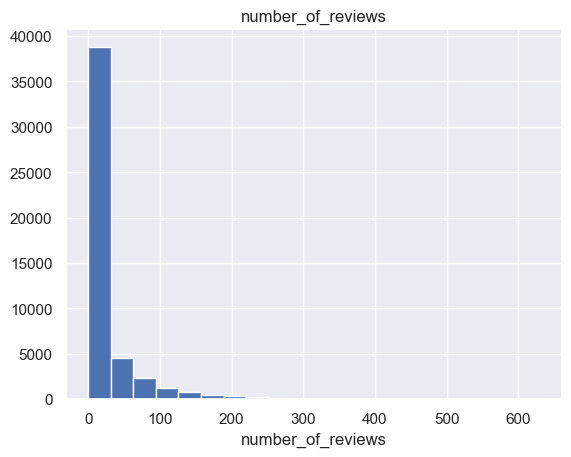

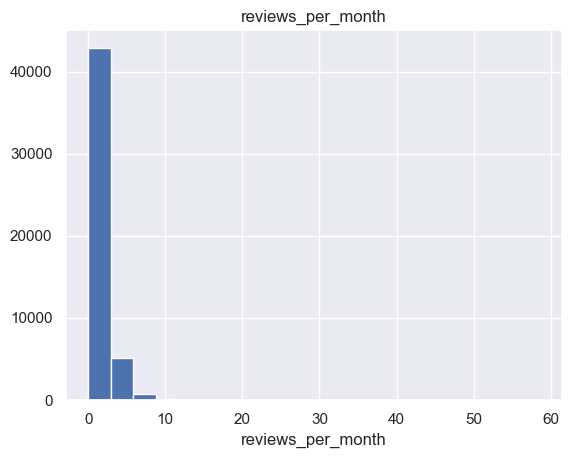

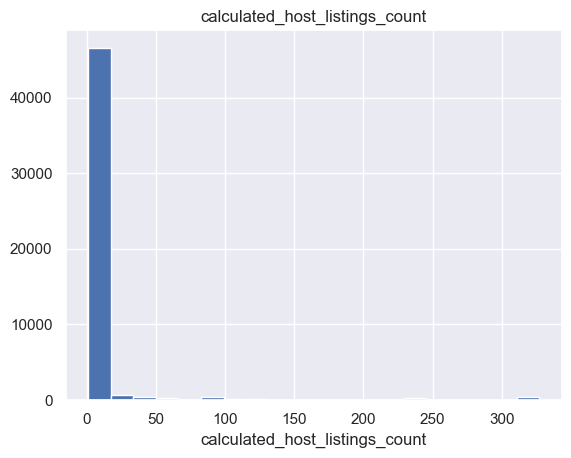

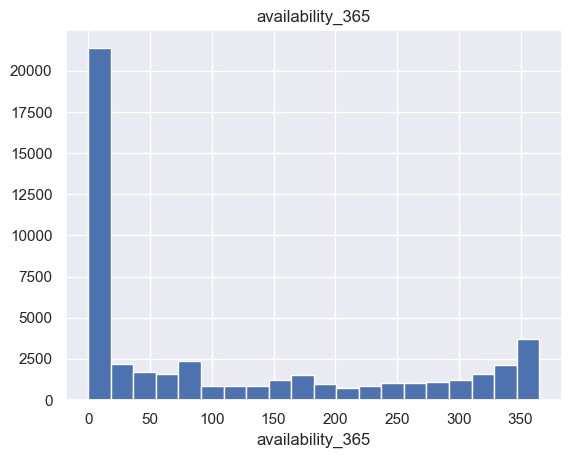

In [205]:
for col in numerical_data[2:]:
    air_bnb_df[col].hist(bins =20)
    plt.xlabel(col)
    plt.title(col)
    plt.show(block = True)
    

### Analyse the categorical colum with the target columns

<Axes: xlabel='neighbourhood_group', ylabel='price'>

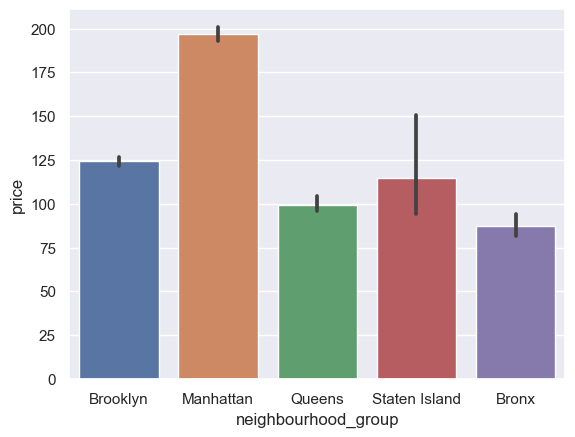

In [206]:
sns.barplot(x = 'neighbourhood_group', y = "price", data = air_bnb_df)

<Axes: xlabel='room_type', ylabel='price'>

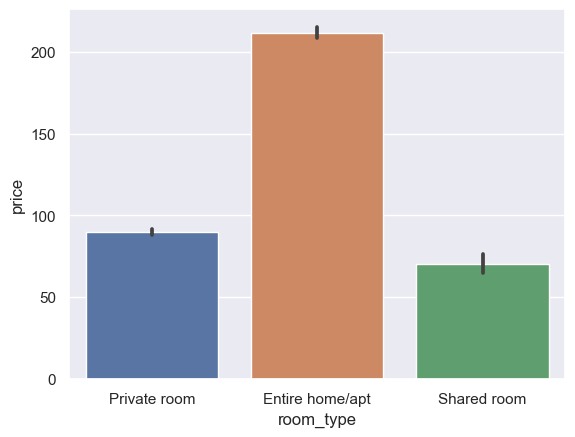

In [207]:
sns.barplot(x = 'room_type', y = "price", data = air_bnb_df)

### Corelation matrix for numerical data

In [208]:
corr_num = air_bnb_df.corr()
corr_num.drop(['id','host_id']).drop(['id','host_id'], axis =1)

C:\Users\subit\AppData\Local\Temp\ipykernel_2400\2267345114.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_num = air_bnb_df.corr()


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.009115,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.131599,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.022373,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.091942,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.530093,-0.072376,0.172028
reviews_per_month,-0.009115,0.131599,-0.022373,-0.091942,0.530093,1.000000,-0.006701,0.162980
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.006701,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.162980,0.225701,1.000000


<Axes: >

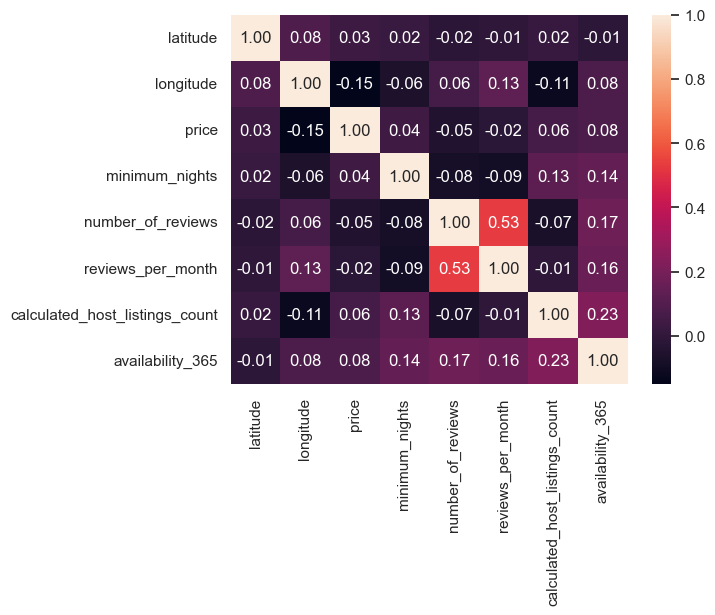

In [209]:
heat_map = corr_num.drop(['id','host_id']).drop(['id','host_id'], axis =1)
sns.heatmap(heat_map, annot = True, fmt = ".2f")

### Analysing the Target Column: Price

<Axes: >

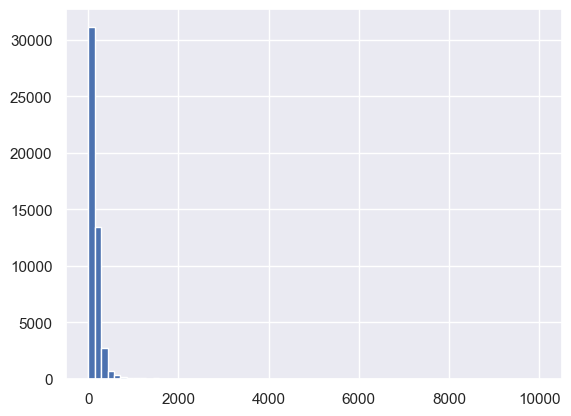

In [210]:
air_bnb_df["price"].hist(bins = 70)

- Data of price column is left skewed

log1p: log1p() method returns log(1+number), computed in a way that is accurate even when the value of number is close to zero.

<Axes: >

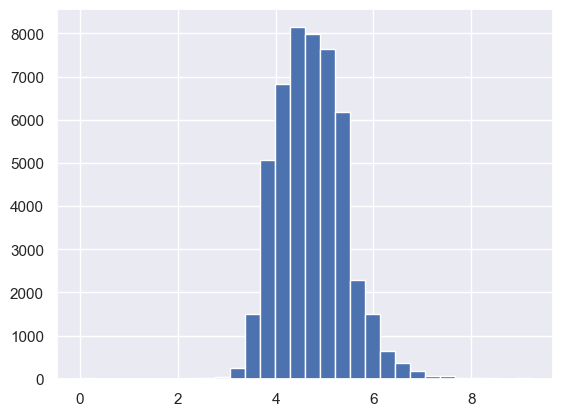

In [211]:
# Checking for the logrithm value of price column
np.log1p(air_bnb_df["price"]).hist(bins = 30)

Text(0.5, 1.0, 'Neighbourhood Group Location')

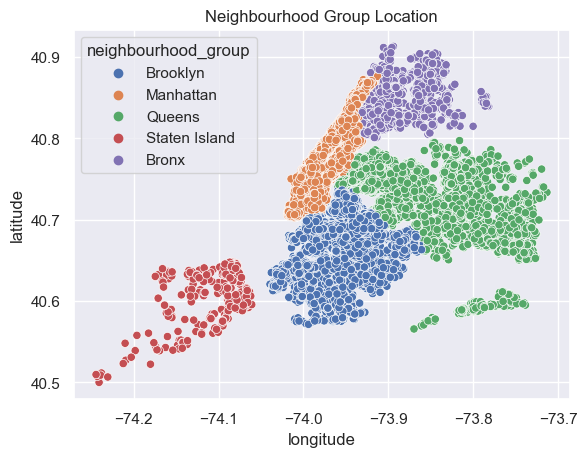

In [212]:
# Location based data on neighbourhood type 
sns.scatterplot(x = 'longitude', y ='latitude', hue = 'neighbourhood_group',
               data = air_bnb_df)
plt.title("Neighbourhood Group Location")

Text(0.5, 1.0, 'Room Type Location')

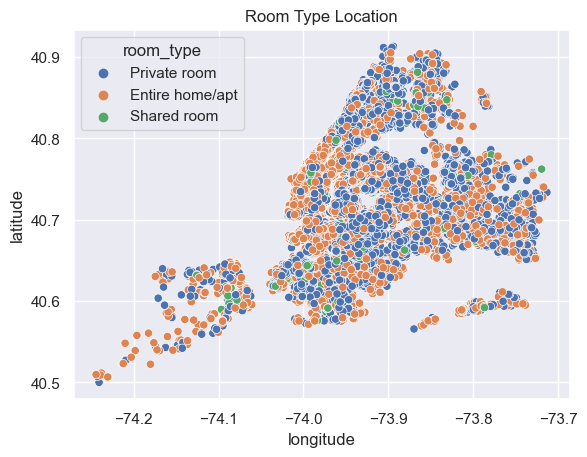

In [213]:
# Location based data on Room type
sns.scatterplot(x = 'longitude', y ='latitude', hue = 'room_type',
               data = air_bnb_df)
plt.title("Room Type Location")

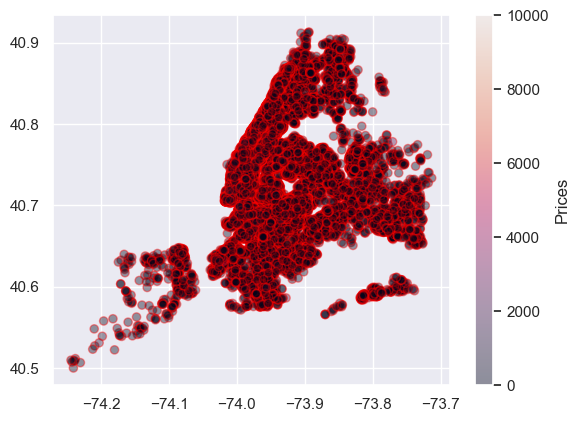

In [214]:
# Location distribution based on Prices

plt.scatter(air_bnb_df.longitude, air_bnb_df.latitude, c = air_bnb_df.price,
            alpha = 0.4,
           edgecolors='red')
cbar = plt.colorbar()
cbar.set_label('Prices')

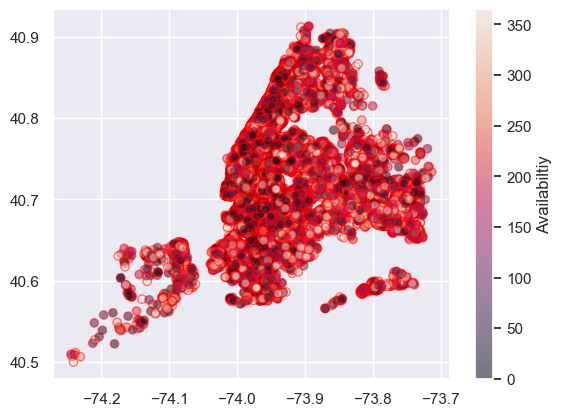

In [215]:
# Location distribution based on Availability

plt.scatter(air_bnb_df.longitude, air_bnb_df.latitude, 
            c = air_bnb_df.availability_365,
            alpha = 0.5,
           edgecolors='red')
cbar = plt.colorbar()
cbar.set_label('Availabiltiy')

Text(0.5, 1.0, 'Neigbourhood Distribution')

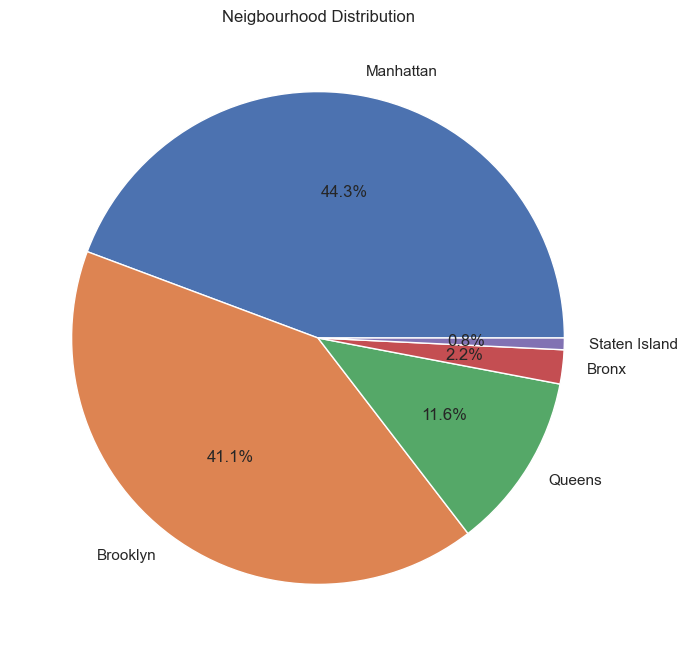

In [216]:
# Pie chart for Neighbour hood distribution
plt.figure(figsize=(8,8))
labels = air_bnb_df['neighbourhood_group'].value_counts().index
sizes = air_bnb_df['neighbourhood_group'].value_counts().values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Neigbourhood Distribution")

<Axes: xlabel='neighbourhood_group', ylabel='price'>

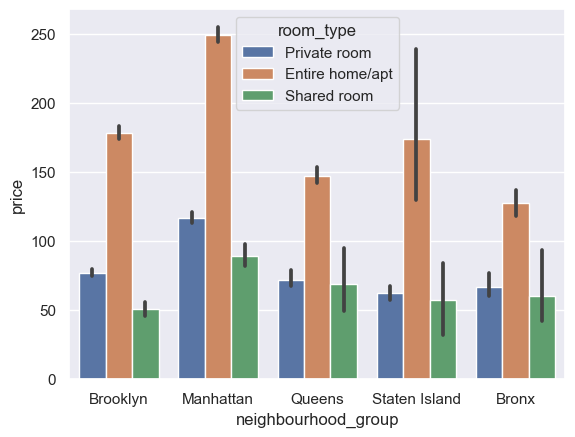

In [217]:
# Price distribution by Room type in Neighbourhood group

sns.barplot(x = 'neighbourhood_group', y = 'price', hue = 'room_type',
           data = air_bnb_df)

<Axes: xlabel='neighbourhood_group', ylabel='reviews_per_month'>

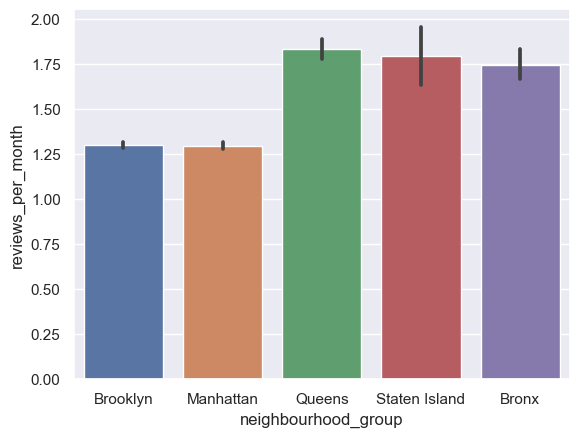

In [218]:
# Comparing monthy review with neighbourhood group
sns.barplot(x = 'neighbourhood_group', y = 'reviews_per_month', 
            data = air_bnb_df)

<Axes: xlabel='neighbourhood_group', ylabel='minimum_nights'>

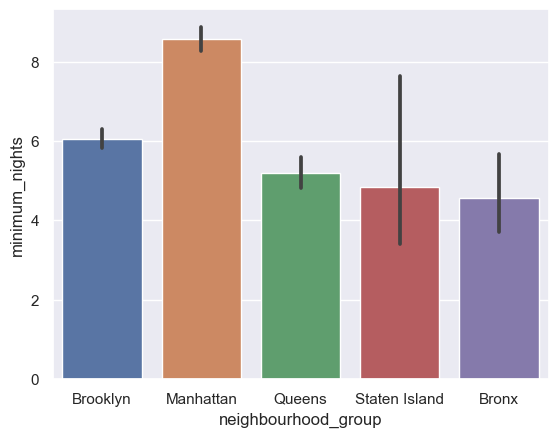

In [219]:
# Comparing minimum stay with neighbourhood group
sns.barplot(x = 'neighbourhood_group', y = 'minimum_nights', data = air_bnb_df)

<Axes: xlabel='neighbourhood_group', ylabel='number_of_reviews'>

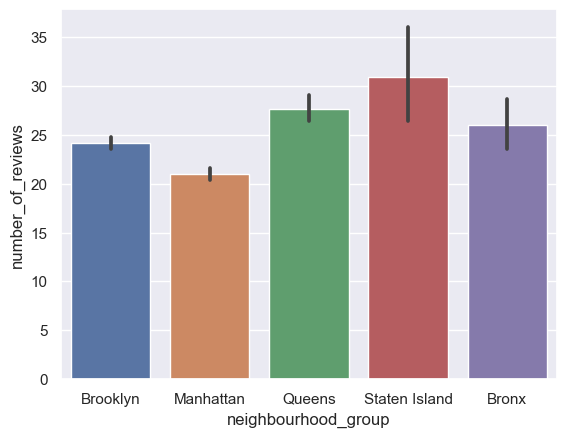

In [220]:
# comparing number of reviews and neighbourhood group
sns.barplot(x = 'neighbourhood_group', y = 'number_of_reviews',
            data = air_bnb_df)

<Axes: xlabel='neighbourhood_group', ylabel='calculated_host_listings_count'>

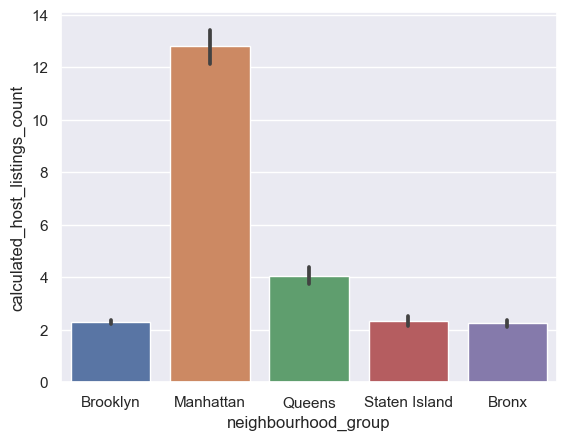

In [221]:
# comparing host listing and neighbourhood group
sns.barplot(x = 'neighbourhood_group', y = 'calculated_host_listings_count',
            data = air_bnb_df)

<Axes: xlabel='neighbourhood_group', ylabel='availability_365'>

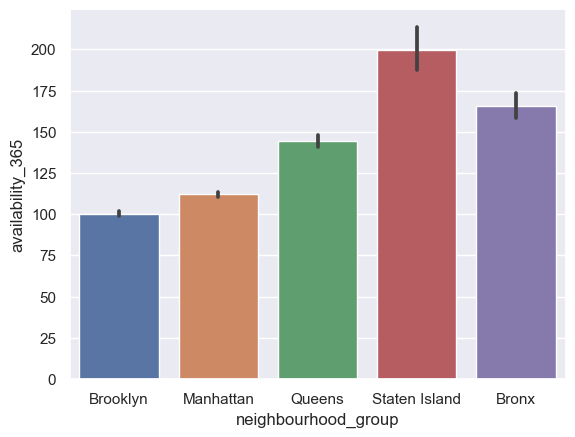

In [222]:
# comparing host listing and neighbourhood group
sns.barplot(x = 'neighbourhood_group', y = 'availability_365',
            data = air_bnb_df)

<Axes: xlabel='room_type', ylabel='number_of_reviews'>

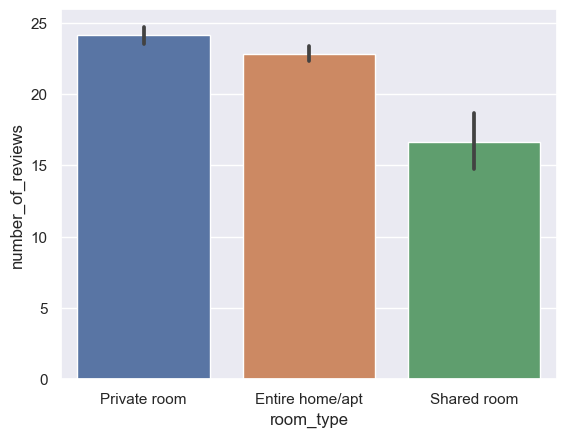

In [223]:
# comparing number of reviews with room type
sns.barplot(x = 'room_type', y = "number_of_reviews", data = air_bnb_df)

<Axes: xlabel='room_type', ylabel='reviews_per_month'>

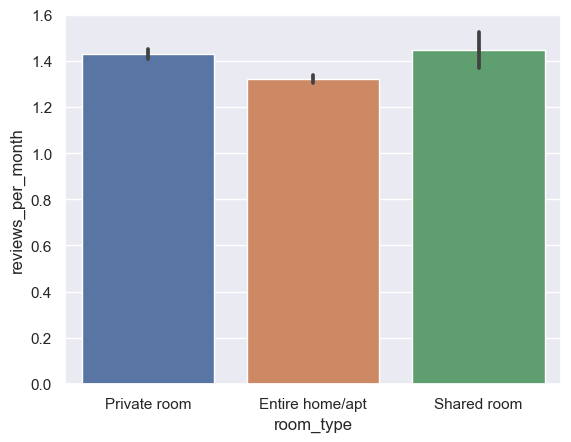

In [224]:
# comparing monthy with room type
sns.barplot(x = 'room_type', y = "reviews_per_month", data = air_bnb_df)

<Axes: xlabel='room_type', ylabel='calculated_host_listings_count'>

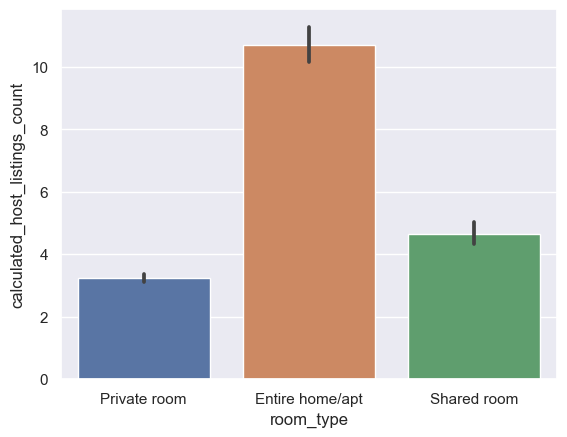

In [225]:
# comparing host list with room type
sns.barplot(x = 'room_type', y = 'calculated_host_listings_count',
            data = air_bnb_df)

<Axes: xlabel='room_type', ylabel='availability_365'>

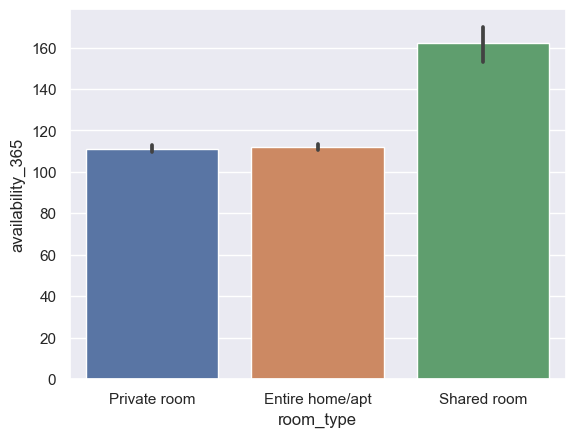

In [226]:
# comparing year availability with room type
sns.barplot(x = 'room_type', y = 'availability_365',
            data = air_bnb_df)

## Data Processing

In [227]:
air_bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [228]:
air_bnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Drop the irrelavent Columns

In [229]:

drop_col = ['id', 'name', 'host_id', 'host_name', 'last_review','neighbourhood']

In [230]:
air_bnb_df.drop(drop_col, axis = 1, inplace = True)

In [231]:
air_bnb_df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0


### Converting the categorical text data to numerical data

In [233]:

air_bnb_new = pd.get_dummies(air_bnb_df, 
                             columns=['neighbourhood_group', 'room_type'],
                            drop_first=False)
air_bnb_new

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.210000,6,365,0,1,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.380000,2,355,0,0,1,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,1.373221,1,365,0,0,1,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.640000,1,194,0,1,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,0.100000,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,1.373221,2,9,0,1,0,0,0,0,1,0
48891,40.70184,-73.93317,40,4,0,1.373221,2,36,0,1,0,0,0,0,1,0
48892,40.81475,-73.94867,115,10,0,1.373221,1,27,0,0,1,0,0,1,0,0
48893,40.75751,-73.99112,55,1,0,1.373221,6,2,0,0,1,0,0,0,0,1


### Data Standardization

In [240]:
# Get the column whose data has to standardize
new_num = [col for col in numerical_data if col not in ['id','host_id','price']]
new_num

['latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [302]:
scaler_data = StandardScaler()

In [290]:
air_bnb_new[new_num] = scaler_data.fit_transform(air_bnb_new[new_num])

In [291]:
air_bnb_new.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-1.493849,-0.437652,149,-0.293996,-0.320414,-0.776641,-0.034716,1.916250,0,1,0,0,0,0,1,0
1,0.452436,-0.684639,225,-0.293996,0.487665,-0.663138,-0.156104,1.840275,0,0,1,0,0,1,0,0
2,1.468399,0.222497,150,-0.196484,-0.522433,0.000000,-0.186451,1.916250,0,0,1,0,0,0,1,0
3,-0.803398,-0.164450,89,-0.293996,5.538156,2.181110,-0.186451,0.617065,0,1,0,0,0,1,0,0
4,1.275660,0.177216,80,0.144807,-0.320414,-0.850084,-0.186451,-0.856865,0,0,1,0,0,1,0,0


In [292]:
# Split the data into feature and Target set
X = air_bnb_new.drop(['price'], axis =1)
Y = air_bnb_new['price']

In [293]:
print(X)
Y

       latitude  longitude  minimum_nights  number_of_reviews  \
0     -1.493849  -0.437652       -0.293996          -0.320414   
1      0.452436  -0.684639       -0.293996           0.487665   
2      1.468399   0.222497       -0.196484          -0.522433   
3     -0.803398  -0.164450       -0.293996           5.538156   
4      1.275660   0.177216        0.144807          -0.320414   
...         ...        ...             ...                ...   
48890 -0.924616   0.048089       -0.245240          -0.522433   
48891 -0.497141   0.411637       -0.147729          -0.522433   
48892  1.573480   0.075821        0.144807          -0.522433   
48893  0.523774  -0.843881       -0.293996          -0.522433   
48894  0.643525  -0.805100       -0.001461          -0.522433   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0              -0.776641                       -0.034716          1.916250   
1              -0.663138                       -0.156104       

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

## Building Model

In [294]:
# Split the data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, 
                                                    random_state = 17)

In [295]:
X.shape, X_train.shape,X_test.shape

((48895, 15), (34226, 15), (14669, 15))

In [296]:
# Create a list for all models
models = [['LR', LinearRegression()],
         ['Lasso', Lasso()],
         ['Ridge', Ridge()],
         ['KNN', KNeighborsRegressor()],
         ['DTR', DecisionTreeRegressor()],
         ['RFR', RandomForestRegressor()]]


models

[['LR', LinearRegression()],
 ['Lasso', Lasso()],
 ['Ridge', Ridge()],
 ['KNN', KNeighborsRegressor()],
 ['DTR', DecisionTreeRegressor()],
 ['RFR', RandomForestRegressor()]]

In [297]:
# Intitalizing list for error score
rmse_scores = []
r2scores = []
mae_scores = []
mse_scores = []

for name, model in models:
    
    # Train the model
    model.fit(X_train, Y_train)
    
    # Predict the test data
    Y_predict = model.predict(X_test)
    
    # Calculate the Mean absolute error
    mae = mean_absolute_error(Y_test, Y_predict)
    mae_scores.append(mae)
    
    # Calculate the Mean Squared Error
    mse = mean_squared_error(Y_test, Y_predict)
    mse_scores.append(mse)
    
    # Calculate r2 score
    r2score = r2_score(Y_test, Y_predict)
    r2scores.append(r2score)
    
    print ("Model:", model)
    print("Mean Absolute Error: ", mae)
    print("Mean Square Error: ", mse)
    print("r2 Score: ", r2score)
    print("************************************")
    

Model: LinearRegression()
Mean Absolute Error:  73.6588461871214
Mean Square Error:  50404.65861309361
r2 Score:  0.10202890809794829
************************************
Model: Lasso()
Mean Absolute Error:  73.35531050618805
Mean Square Error:  50607.07934212134
r2 Score:  0.09842273422295222
************************************
Model: Ridge()
Mean Absolute Error:  73.65700847161742
Mean Square Error:  50404.95717291561
r2 Score:  0.10202358918305576
************************************
Model: KNeighborsRegressor()
Mean Absolute Error:  70.21611561796986
Mean Square Error:  53561.50195105325
r2 Score:  0.04578898629010675
************************************
Model: DecisionTreeRegressor()
Mean Absolute Error:  86.86038584770604
Mean Square Error:  91878.78008044175
r2 Score:  -0.6368425209417163
************************************
Model: RandomForestRegressor()
Mean Absolute Error:  66.77300088622265
Mean Square Error:  49914.9956767537
r2 Score:  0.11075237084341161
****************

Text(0.5, 1.0, 'Performance Metrics(MAE)')

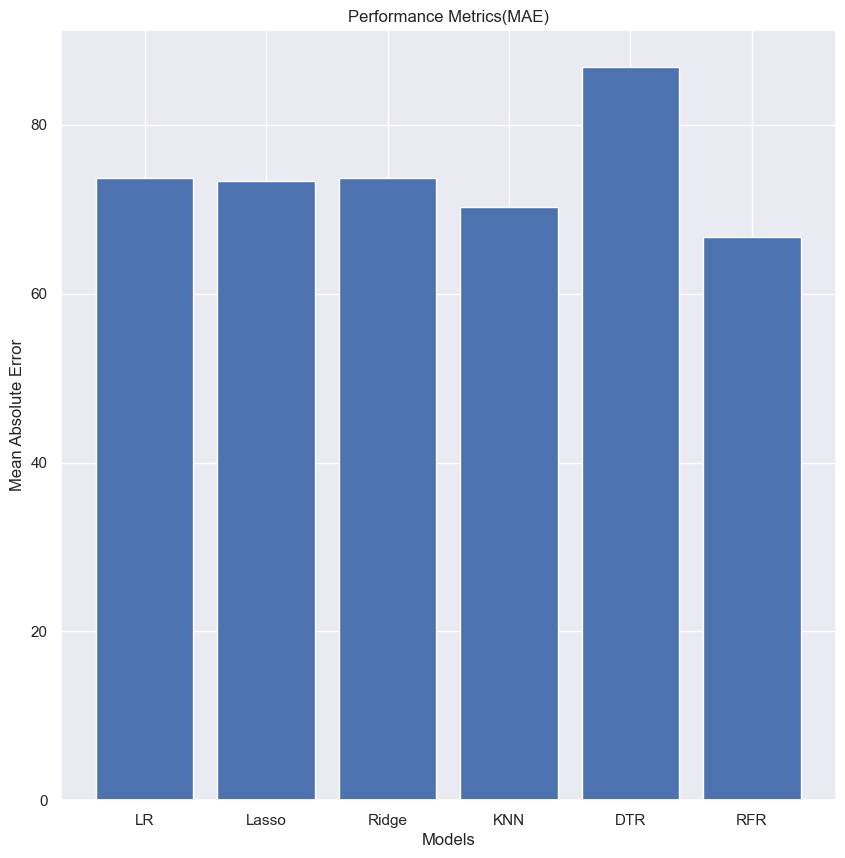

In [298]:
# Plot for Mean Absoluate Error
plt.figure(figsize=(10, 10))
plt.bar([name[0] for name in models], mae_scores)
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error")
plt.title("Performance Metrics(MAE)")

Text(0.5, 1.0, 'Performance Metrics(MSE)')

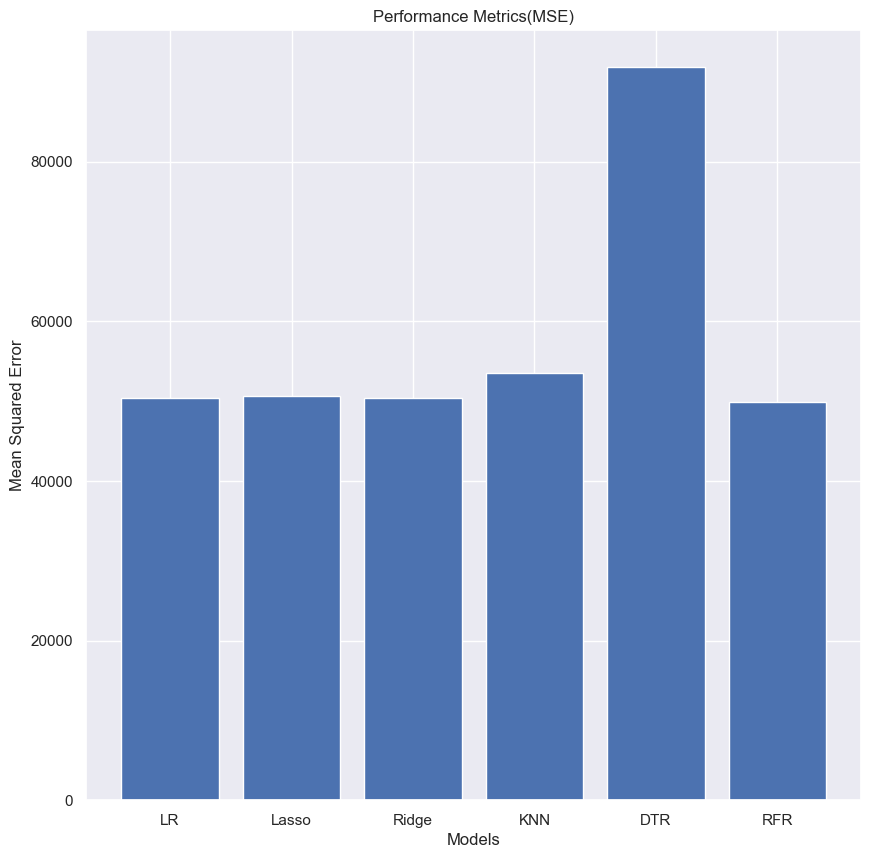

In [299]:
# Plot for Mean Squared Error
plt.figure(figsize=(10, 10))
plt.bar([name[0] for name in models], mse_scores)
plt.xlabel("Models")
plt.ylabel("Mean Squared Error")
plt.title("Performance Metrics(MSE)")

Text(0.5, 1.0, 'Performance Metrics(r2 square)')

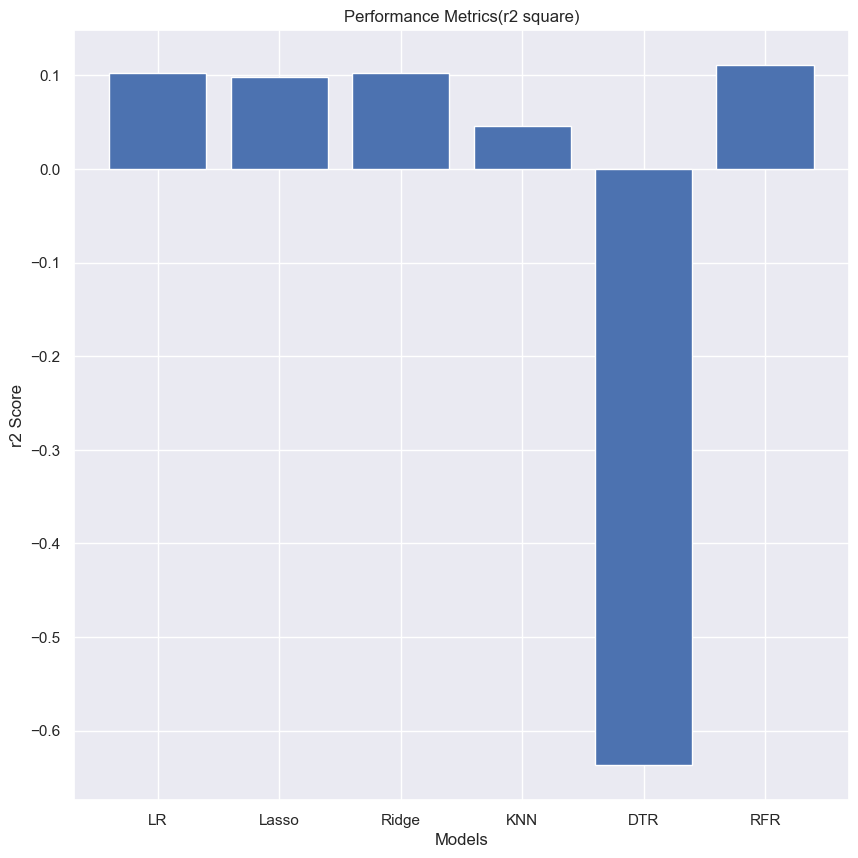

In [300]:
# Plot for r2 score
plt.figure(figsize=(10, 10))
plt.bar([name[0] for name in models], r2scores)
plt.xlabel("Models")
plt.ylabel("r2 Score")
plt.title("Performance Metrics(r2 square)")